# Data Description:

In this project,we have to make carprice valuation model using new machine learning models from new data.Because with the change in market due to covid 19 impact, our client is facing problems
with their previous car price valuation machine learning models. 

In [1]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df=pd.read_excel('Car_prediction_price.xlsx')

In [4]:
df.head()   #Checking first 5 rows

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
0,"'BMW 3 Series 320d, 2011, Diesel',",88000,Diesel,2011,"'ANDHERI EAST, MUMBAI',",695000
1,"'BMW 3 Series 320d Sedan, 2010, Diesel',",120000,Diesel,2010,"'GOREGAON EAST, MUMBAI',",545000
2,"'BMW 3 Series 320d, 2011, Diesel',",88000,Diesel,2011,"'THANE WEST, THANE',",695000
3,"'Audi A6 35 TDI, 2007, Diesel',",62000,Diesel,2007,"'THANE BELAPUR ROAD, THANE',",549000
4,"'BMW 530d Diesel',",96000,Diesel,2008,"'ANDHERI EAST, MUMBAI',",620000


In [10]:
df.columns   #Name of the columns in the dataset

Index(['                                 Model(used car)', '       Km driven',
       '    Fuel', '   year of purchase',
       '                           Location', '            Price'],
      dtype='object')

In [5]:
#Checking the info() method to get an a general idea about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0                                    Model(used car)  37 non-null     object
 1          Km driven                                  37 non-null     int64 
 2       Fuel                                          28 non-null     object
 3      year of purchase                               37 non-null     int64 
 4                              Location               37 non-null     object
 5               Price                                 37 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [7]:
#Lets check the null values if any
df.isnull().sum()

                                 Model(used car)    0
       Km driven                                    0
    Fuel                                            9
   year of purchase                                 0
                           Location                 0
            Price                                   0
dtype: int64

There are 9 null values present in the column 'Fuel'

In [8]:
#Shape of the dataset
df.shape

(37, 6)

rows-37

columns-6

In [11]:
#Analysing data of the column 'Fuel'
df['    Fuel'].value_counts()

Diesel    19
Petrol     9
Name:     Fuel, dtype: int64

In [15]:
#Removing the null values from the column 'Fuel'
#replace the values with mode

from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['    Fuel']=imp.fit_transform(df['    Fuel'].values.reshape(-1,1))

In [16]:
#Lets check the null values again if they are removed or not
df.isnull().sum()

                                 Model(used car)    0
       Km driven                                    0
    Fuel                                            0
   year of purchase                                 0
                           Location                 0
            Price                                   0
dtype: int64

Now there are no null values present.

Now,we will encode the columns so that we can convert the object olumns into numeric.

We will go with Label Encoding

In [17]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['                                 Model(used car)'] = le.fit_transform(df['                                 Model(used car)'])
df['    Fuel'] = le.fit_transform(df['    Fuel'])
df['                           Location'] = le.fit_transform(df['                           Location'])

In [18]:
#Now lets check the first five rows of the dataset
df.head()

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
0,33,88000,0,2011,23,695000
1,9,120000,0,2010,7,545000
2,10,88000,0,2011,19,695000
3,8,62000,0,2007,18,549000
4,11,96000,0,2008,2,620000


Now my data is ready for Machine Learning.

In [20]:
#Checking for correlation
df.corr()

,Model(used car),Km driven,Fuel,year of purchase,Location,Price
Model(used car),1.000000,-0.016963,-0.288842,0.040026,0.490608,-0.013057
Km driven,-0.016963,1.000000,-0.051322,-0.643592,0.133977,-0.307969
Fuel,-0.288842,-0.051322,1.000000,0.309357,-0.495556,-0.251713
year of purchase,0.040026,-0.643592,0.309357,1.000000,-0.193101,0.059986
Location,0.490608,0.133977,-0.495556,-0.193101,1.000000,0.007689
Price,-0.013057,-0.307969,-0.251713,0.059986,0.007689,1.000000


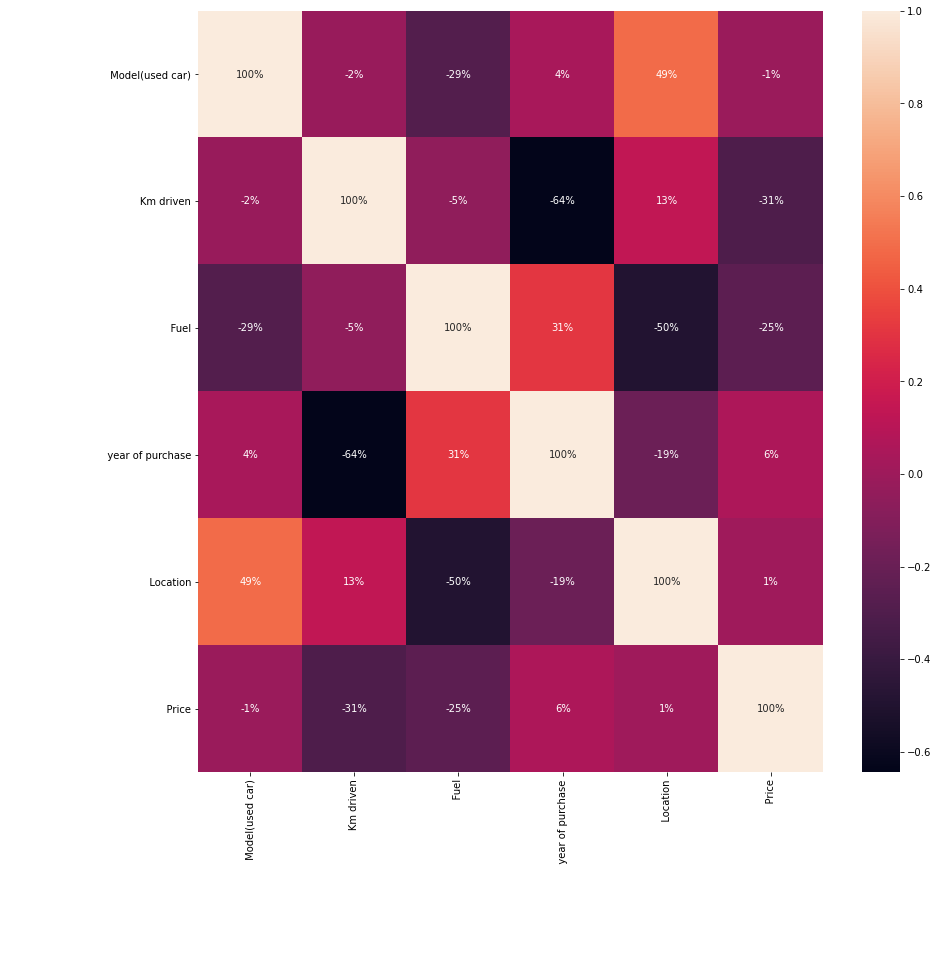

In [21]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From the correlation matrix,we can see that less columns are positively correlated with the target variable 'Price'.We can see that the independent variables are highly correlated with each other,for example,'Model(used car)' is highly correlated with 'Location'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ABEB7D32E0>,
      dtype=object)

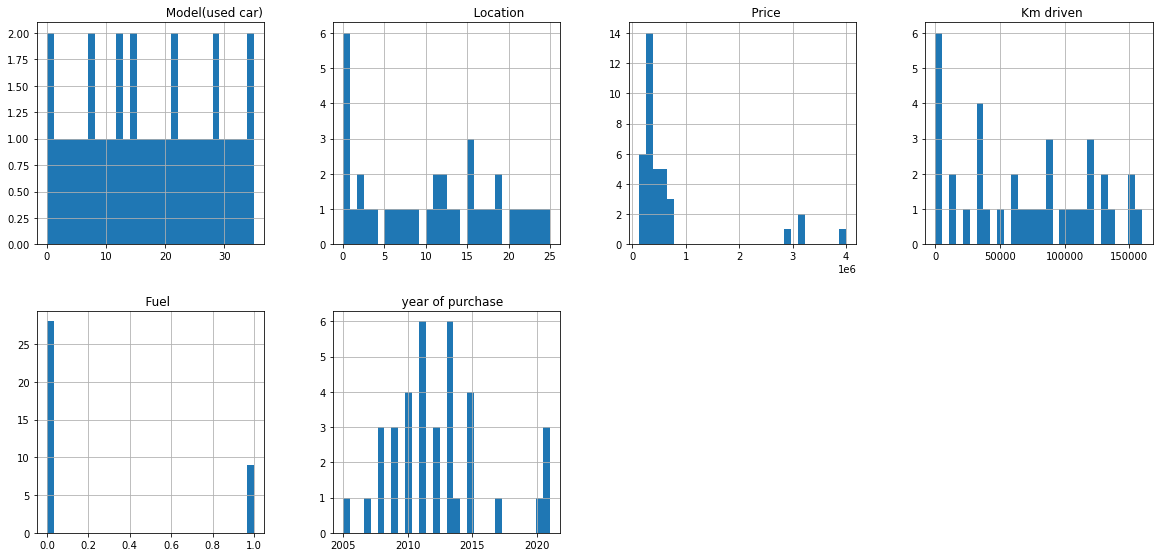

In [22]:
#Plotting histogram
#A histogram shows the frequency on the vertical axis and the horizontal axis in another dimension. 
# In this graph, we can also check whether the graph is right skewed, left skewed or the graph is normally distributed graph
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

Data is almost normally distributed.

In [23]:
#Checking skewness in my data
df.skew()

                                 Model(used car)    0.040904
       Km driven                                    0.083194
    Fuel                                            1.248066
   year of purchase                                 0.794666
                           Location                 0.081519
            Price                                   2.609456
dtype: float64

We will not go for skewness removal for object type columns

                                 Model(used car)       AxesSubplot(0.125,0.71587;0.133621x0.16413)
       Km driven                                    AxesSubplot(0.285345,0.71587;0.133621x0.16413)
    Fuel                                             AxesSubplot(0.44569,0.71587;0.133621x0.16413)
   year of purchase                                 AxesSubplot(0.606034,0.71587;0.133621x0.16413)
                           Location                 AxesSubplot(0.766379,0.71587;0.133621x0.16413)
            Price                                     AxesSubplot(0.125,0.518913;0.133621x0.16413)
dtype: object

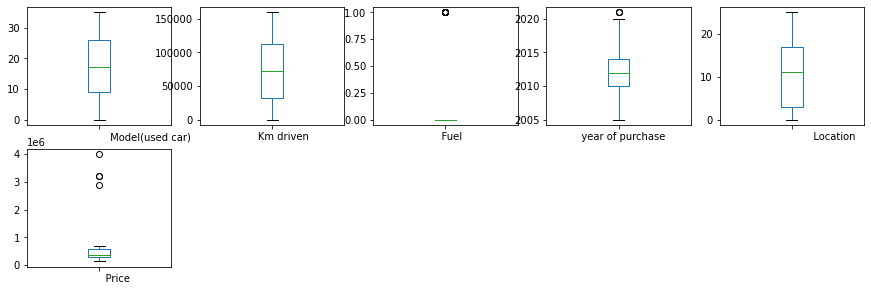

In [24]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From the boxplots,it is clearly seen that no such outliers are present,so I will not go for outlier removal.

In [25]:
#Splitting the independent and target variable in x and y
x=df.drop('            Price',axis=1)
y=df['            Price']

In [26]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [27]:
#Model Building(Finding the best random state)

model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

r2 score correspond to random state 40 is -0.2577393178577596
r2 score correspond to random state 40 is 0.12146506691214565
r2 score correspond to random state 40 is 0.8672728161376037
r2 score correspond to random state 40 is 0.2300177089790023
r2 score correspond to random state 40 is -0.15605586588121723
r2 score correspond to random state 41 is 0.9375288874588996
r2 score correspond to random state 41 is 0.0013612284247461748
r2 score correspond to random state 41 is 0.44090619411534315
r2 score correspond to random state 41 is -0.06108916956640664
r2 score correspond to random state 41 is 0.7435662457070504
r2 score correspond to random state 42 is -5.561062395229272
r2 score correspond to random state 42 is -1.0408987565889496
r2 score correspond to random state 42 is -5.364319133832308
r2 score correspond to random state 42 is -2.2274264199995386
r2 score correspond to random state 42 is -7.244325108365315
r2 score correspond to random state 43 is -0.13030104522153052
r2 score c

Above I am using for loop which helps me to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

The best model is AdaBoostRegressor and the r2 score is 98% to random state 60.

In [28]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=60,test_size=0.33)

In [32]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(train_x,train_y)

AdaBoostRegressor()

In [33]:
y_pred=ab.predict(test_x)

In [34]:
ab.score(train_x,train_y)

0.9892751335707345

In [35]:
ab.score(test_x,test_y)

0.9729153057594997

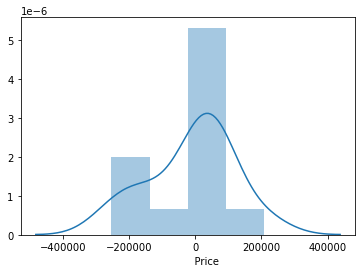

In [36]:
#Distribution plot
sns.distplot(test_y-y_pred)
plt.show()

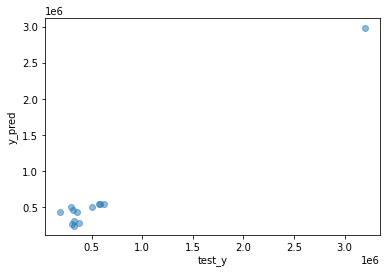

In [37]:
#Scatter-plot
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,y_pred))
print('Mean Squared Error:',mean_squared_error(test_y,y_pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,y_pred)))

Mean Absolute Error: 95321.63992673994
Mean Squared Error: 15556351773.986591
Root Mean Absolute Error: 308.7420281185248


In [39]:
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#List of parameters to pass
n_estimators = [10,50,100]
loss=['linear','square','exponential']
#max_features = ['auto', 'sqrt']
#max_depth = [2, 3, 5]
#min_samples_split = [2, 4, 6]
#min_samples_leaf = [1, 2, 4, 6]
learning_rate=[0.1]

In [51]:
#Creating random grid

random_grid = {'n_estimators': n_estimators,
               'loss':loss,
               'learning_rate':learning_rate}

In [52]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
ab_random = RandomizedSearchCV(estimator = ab, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=60, n_jobs = 1)

In [53]:
ab_random.fit(train_x,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.1s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.1s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.1s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, loss=linear, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, loss=linear, n_est

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [10, 50, 100]},
                   random_state=60, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
ab_random.best_params_

{'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.1}

In [55]:
ab=AdaBoostRegressor(n_estimators=50,loss='exponential',learning_rate=0.1)
ab.fit(train_x,train_y)
ab.score(train_x,train_y)
pred=ab.predict(test_x)
abr=r2_score(test_y,pred)
print('R2 score:',abr*100)

R2 score: 98.91148020928856


The accuracy obtained using AdaBoostRegressor is 99%.